imports pandas, numpy, yfinance, matplot, seaborn

In [9]:
# Core libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside notebook
%matplotlib inline

# Style
sns.set(style="whitegrid")

# Check versions (optional but helpful)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)



pandas: 2.0.3
numpy: 1.24.3


downloads market data

In [10]:
import datetime as dt

start_date = dt.datetime(2015, 1, 1)
end_date = dt.datetime.today()

spy = yf.download('SPY', start=start_date, end=end_date, auto_adjust=True)['Close']
tlt = yf.download('TLT', start=start_date, end=end_date, auto_adjust=True)['Close']
gld = yf.download('GLD', start=start_date, end=end_date, auto_adjust=True)['Close']

data = pd.concat([spy, tlt, gld], axis=1)
data.columns = ['SPY', 'TLT', 'GLD']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


verifies market data

In [11]:
print(data.head())
print(data.tail())

                   SPY        TLT         GLD
Date                                         
2015-01-02  171.568008  96.512863  114.080002
2015-01-05  168.469559  98.028976  115.800003
2015-01-06  166.882751  99.795151  117.120003
2015-01-07  168.962326  99.598068  116.430000
2015-01-08  171.960587  98.279083  115.940002
                   SPY        TLT         GLD
Date                                         
2025-08-06  632.780029  87.820000  310.500000
2025-08-07  632.250000  87.669998  313.119995
2025-08-08  637.179993  87.290001  313.049988
2025-08-11  635.919983  87.389999  308.549988
2025-08-12  642.690002  86.949997  308.269989


creates returns

In [12]:
returns = np.log(data / data.shift(1)).dropna()

verifies returns

In [13]:
print(returns.head())
print(returns.tail())

                 SPY       TLT       GLD
Date                                    
2015-01-05 -0.018225  0.015587  0.014965
2015-01-06 -0.009464  0.017856  0.011334
2015-01-07  0.012384 -0.001977 -0.005909
2015-01-08  0.017590 -0.013332 -0.004217
2015-01-09 -0.008046  0.010893  0.011321
                 SPY       TLT       GLD
Date                                    
2025-08-06  0.007631 -0.005791 -0.002123
2025-08-07 -0.000838 -0.001710  0.008403
2025-08-08  0.007767 -0.004344 -0.000224
2025-08-11 -0.001979  0.001145 -0.014479
2025-08-12  0.010590 -0.005048 -0.000908


saves returns

In [14]:
returns.to_csv("../data/returns.csv")


plots projections

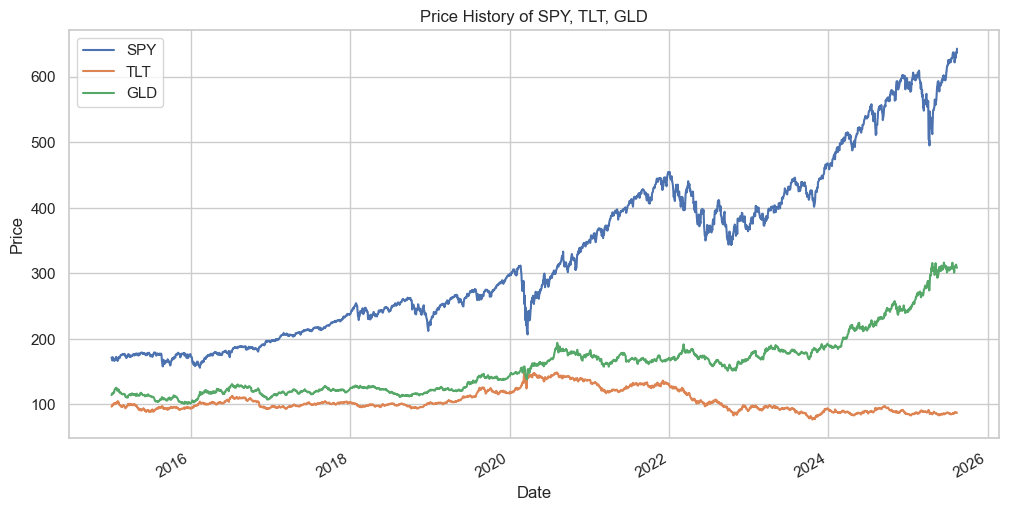

In [15]:
data.plot(figsize=(12, 6), title="Price History of SPY, TLT, GLD")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()


plots returns

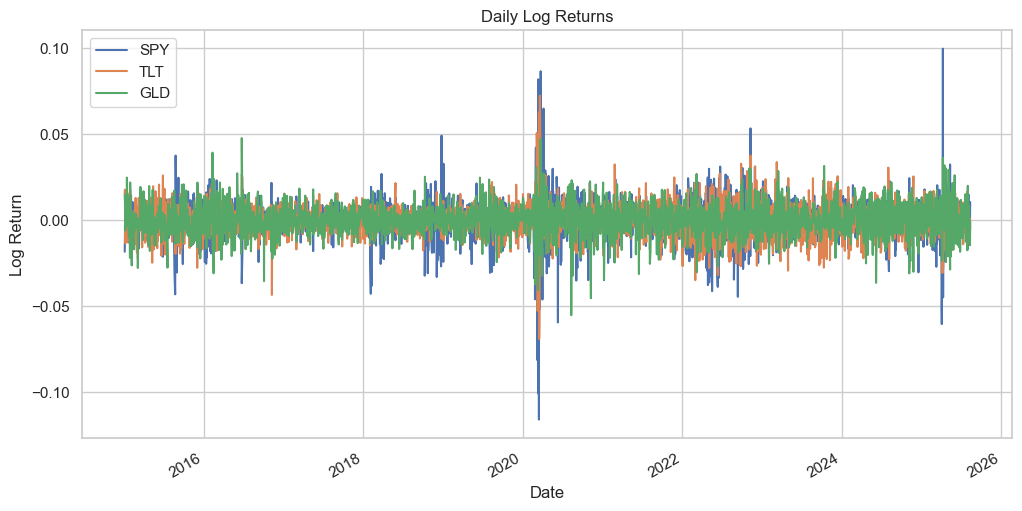

In [16]:
returns.plot(figsize=(12, 6), title="Daily Log Returns")
plt.ylabel("Log Return")
plt.xlabel("Date")
plt.grid(True)
plt.show()
